<center>$\huge{\textbf{AI using Python}}$</center>
<center>$\hspace{.1cm}$</center>
<center>$\Large{\textbf{19. Convolutional Neural Network}}$</center>

---

<center>

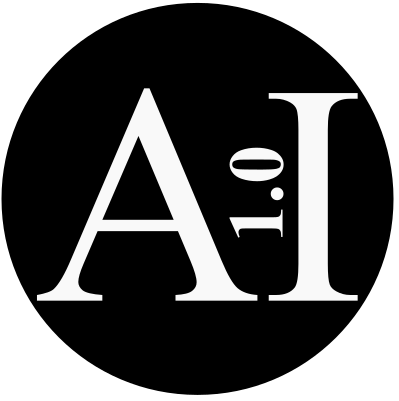

</center>

$\large{\textbf{19.1 Convolutional Neural Network (CNN)}}$

* $\color{red}{\textbf{CNN}}$ is deep neural network.

* CNN consists of the following layers:

    * Convolution layers
    * Subsampling or pooling layers:
    * Layers of feedforward NN

* Convolution layers are used to represent temporal or spatial relationships in the data.

* Let $x_{k}, k=0,1,\dots,N$ and $h_{k}, k=0,1,\dots,M$ be two finite sequences, then the convolution of $x$ and $h$ is defined as:
    \begin{equation}
        (x*h)_{k}= \sum_{i=0}^{N}x_{i}h_{k-i} = \sum_{i=0}^{M}x_{k-i}h_{i}
    \end{equation}

* The convolution operation can be represented as a matrix multiplication and let the convolution and pooling layers be represented as a function $f_{C}$. Then the CNN can be represented as:
   \begin{equation}
        \hat{y}_{k} = f_{NN}(f_{C}(x_{k};\theta_{C});\theta_{NN})
  \end{equation}
where $\theta_{C}$ contains the parameters in the convolution layer.
*   Training data contains:

   *  $\color{red}{\textbf{Inputs}}$: consists of $N$ observations $\{ x_{1}, x_{2},...,x_{N} \}$
   where $x_{k} \in \mathbb{R}^n,$ $k=1,..,N$ are the $N$ input samples.
   *  $\color{red}{\textbf{Outputs}}$: consists of $N$ observations $\{ y_{1}, y_{2},...,y_{N} \}$
   where $y_{k} \in \mathbb{R}^p,$ $k=1,..,N$ are the $N$ output samples.
* Optimization problem for CNN:
\begin{equation}
\underset{\theta_{C},\theta_{NN}}{\min} \hspace{.2cm} \sum_{k=1}^{N}  {\parallel y_{k} - \hat{y}_{k} \parallel }^{2}  
\end{equation}

* Applications of CNN:
    * Image classification
    * Image and video recognition
    * Recommendation systems
    * Natural language processing
    * Time series analysis

$\large{\textbf{19.2 Illustrating CNN}}$

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MNIST dataset
(Xtr, Ytr), (Xts, Yts) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize input data between 0 and 1
Xtr, Xts = Xtr / 255.0, Xts / 255.0

# Reshape the input data for CNN
Xtr = Xtr.reshape(-1, 28, 28, 1)
Xts = Xts.reshape(-1, 28, 28, 1)

In [ ]:
# Define the CNN model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(Xtr, Ytr, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.8944 - loss: 0.3575
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9815 - loss: 0.0582
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9863 - loss: 0.0420
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9910 - loss: 0.0289
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 29ms/step - accuracy: 0.9935 - loss: 0.0209


In [ ]:
test_loss, test_acc = model.evaluate(Xts, Yts, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.9901 - loss: 0.0312

Test accuracy: 0.9901000261306763


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


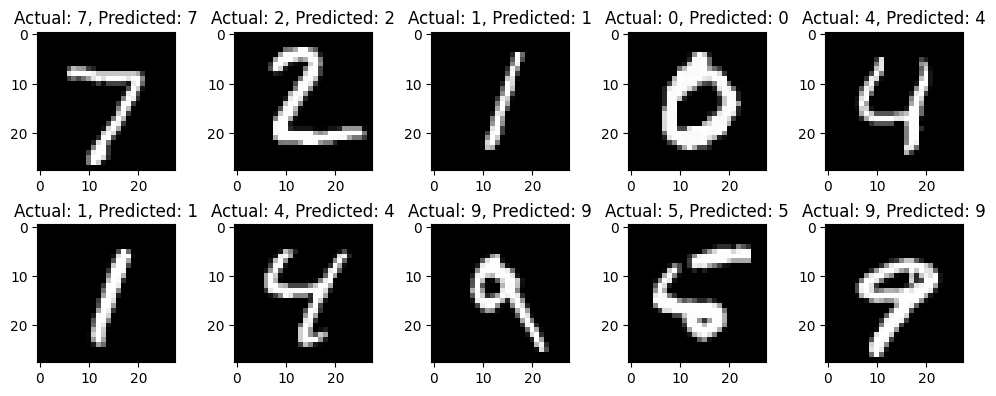

In [ ]:
# Predict on a few test images
predictions = model.predict(Xts[:10])
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(Xts[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Actual: {Yts[i]}, Predicted: {np.argmax(predictions[i])}")
plt.tight_layout()
plt.show()

$\large{\textbf{19.3 Thank you!}}$

In [ ]:
print('Thank you')

Thank you
